### Images as Matrices. Image arithmetic
One direct use of matrices and transformations is images. An image is a 2D array (i.e. matrix) of pixels. If it's grayscale, each pixel will be an integer from 0 to 255:
$$ I=\begin{bmatrix}
20 & 45 & 83 & \dots \\
38 & 182 & 200 & \dots \\
\dots & \dots & \dots & \dots \\
\end{bmatrix} $$

In an RGB image, each pixel contains an array with three values, corresponding to $R$, $G$ and $B$. In other words an RGB image is a **three-dimensional matrix** (height, width, RGB color code).

A bigger number means more brightness in the corresponding channel, for example `[255, 0, 0]` is a completely red pixel. `[0, 0, 0]` is a black pixel, and `[255, 255, 255]` is a white pixel.

Because we treat images as matrices, we can peform arithmetic operations on them.

To show an image, you can use `plt.imshow()`.

#### Opening an image from the Internet
There's a library for working with images called `scikit-image` that returns a `numpy` array, which is perfect for us.

In [1]:
import skimage.io
import matplotlib.pyplot as plt

In [2]:
def read_image(url):
    img = skimage.io.imread(url)
    return img

In [3]:
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

In [4]:
cat_image[0][0] # First pixel is an array with 3 values: [r, g, b]

array([35, 55,  4], dtype=uint8)

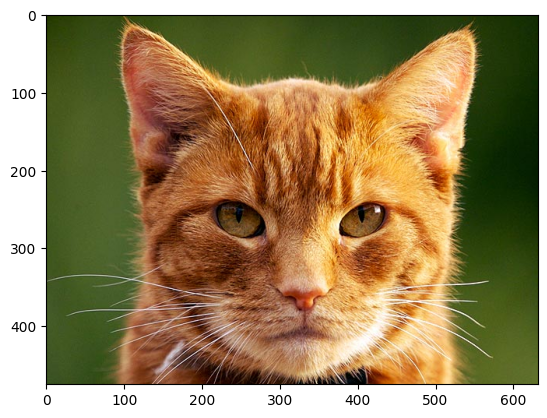

In [5]:
plt.imshow(cat_image)
plt.show()

In most cases, it's useful to treat the channels one by one.

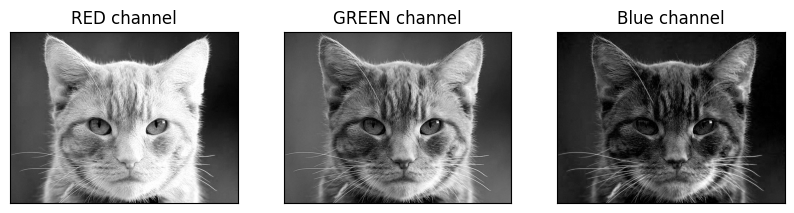

In [6]:
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]
f, (ax_r, ax_g, ax_b) = plt.subplots(1, 3, figsize = (10, 5))
ax_r.imshow(cat_image_r, cmap = "gray") # Reds_r
ax_r.set_title("RED channel")
ax_g.imshow(cat_image_g, cmap = "gray") # Greens_r
ax_g.set_title("GREEN channel")
ax_b.imshow(cat_image_b, cmap = "gray") # Blues_r
ax_b.set_title("Blue channel")
plt.setp([ax_r, ax_g, ax_b], xticks = [], yticks = []) # Remove axis ticks
plt.show()

The lighter a pixel above is, the higher is the value for this color (R/G/B).

If we simply add the channels together, without making them red, green or blue, we'll get a grayscale image.

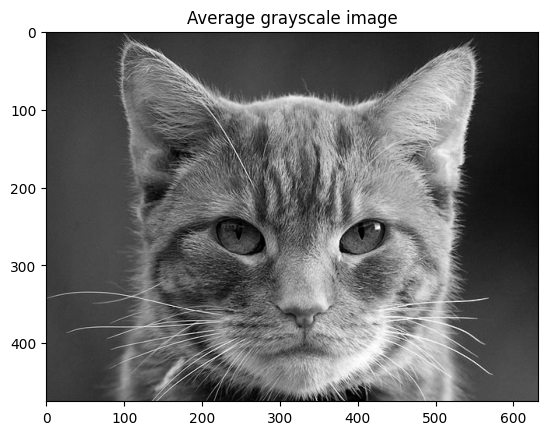

In [7]:
# Calculate the average of the normalized channels. We need to divide by 3 each channel first, since we are 
# not using normal integers, but numpy 8-bit integers instead and if we don't do this, we'll get 1s everywhere,
# where the sum of the channels is above 255.
cat_image_gray = cat_image_r/3 + cat_image_g/3 + cat_image_b/3
plt.imshow(cat_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

The eye is more sensitive to greens than reds or blues. There are several ways to apply that correction, but we'll use [this one](https://stackoverflow.com/questions/14330/rgb-to-monochrome-conversion). This is called **luminance correction** (or **gamma correction**).

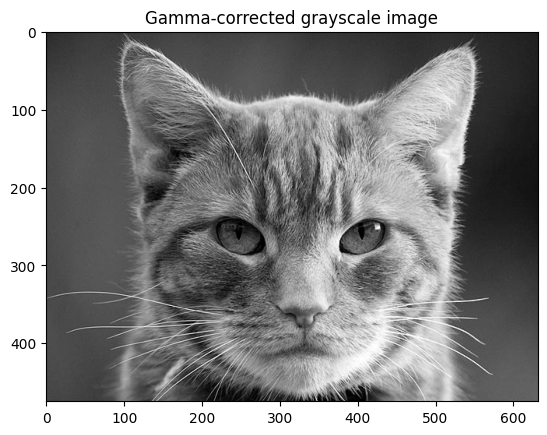

In [8]:
cat_image_gray_corrected = (0.299 * cat_image_r + 
                            0.587 * cat_image_g + 
                            0.114 * cat_image_b)
plt.gca().imshow(cat_image_gray_corrected, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()

If we want to create an artistic grayscale image, we can always change the coefficients. Feel free to experiment with this.

So, there we go. We just performed matrix operations on images. Later, we'll talk about matrix multiplication and convolution, which is a very cool way of processing images.

For the time being, let's just try one more thing. The **image histogram** will give us information of how bright our image is. On the x-axis, there are pixel values from 0 to 255. On the y-axis, there is the count of all values, for example 10 pixels with value 0, 30 pixels with value 1 and so on.

`ravel()` represents the image as a single-dimensional vector.

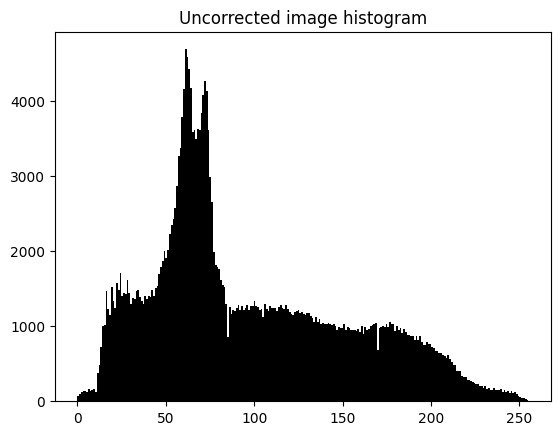

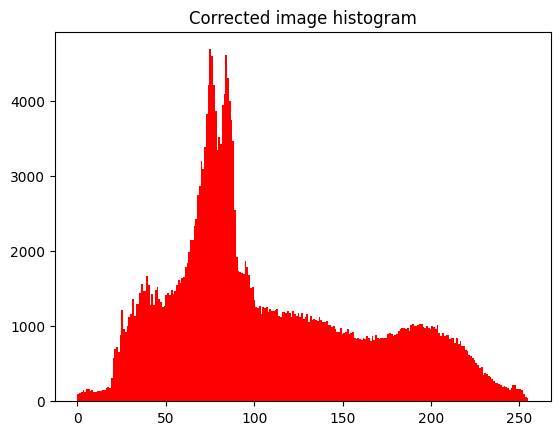

In [9]:
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black")
plt.title("Uncorrected image histogram")
plt.show()

plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

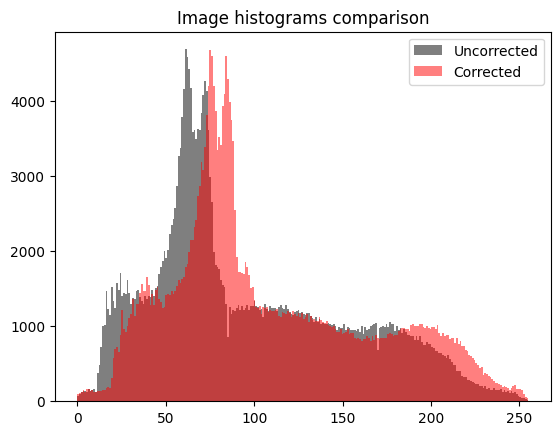

In [10]:
# Represent the image as a single-dimensional vector
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black", alpha = 0.5, label = "Uncorrected")
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Corrected")
plt.title("Image histograms comparison")
plt.legend()
plt.show()

Now display the histograms for each image channel.

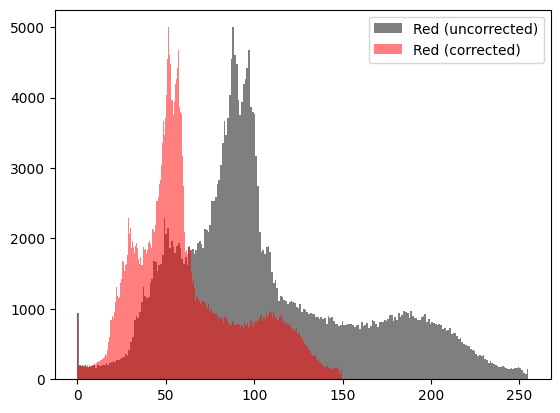

In [11]:
cat_image_g_corrected = (0.587 * cat_image_g)
plt.hist(cat_image_g.ravel(), bins = 256, color = "black", alpha = 0.5, label = "Red (uncorrected)")
plt.hist(cat_image_g_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Red (corrected)")
plt.legend()
plt.show()

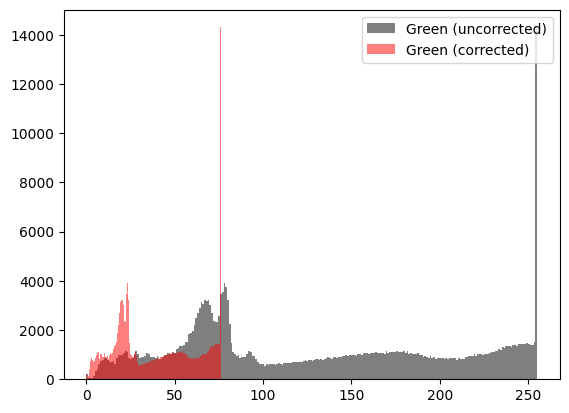

In [12]:
cat_image_r_corrected = (0.299 * cat_image_r)
plt.hist(cat_image_r.ravel(), bins = 256, color = "black", alpha = 0.5, label = "Green (uncorrected)")
plt.hist(cat_image_r_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Green (corrected)")
plt.legend()
plt.show()

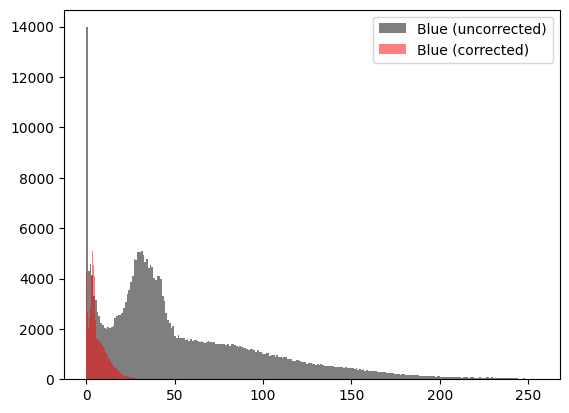

In [13]:
cat_image_b_corrected = (0.114 * cat_image_b)
plt.hist(cat_image_b.ravel(), bins = 256, color = "black", alpha = 0.5, label = "Blue (uncorrected)")
plt.hist(cat_image_b_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Blue (corrected)")
plt.legend()
plt.show()